In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [5]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

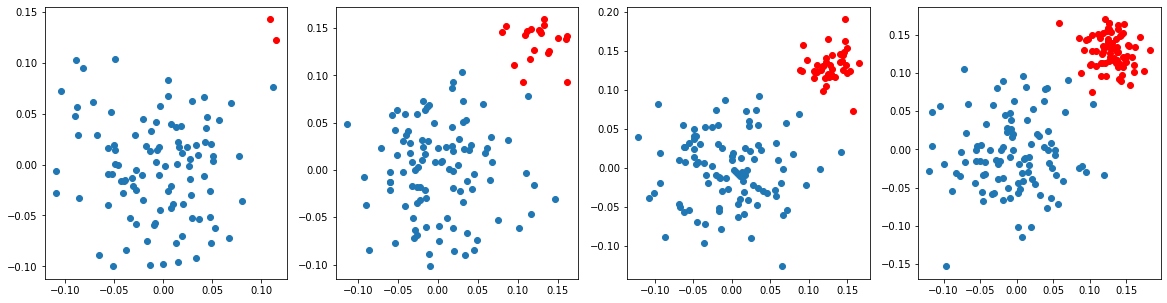

In [9]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

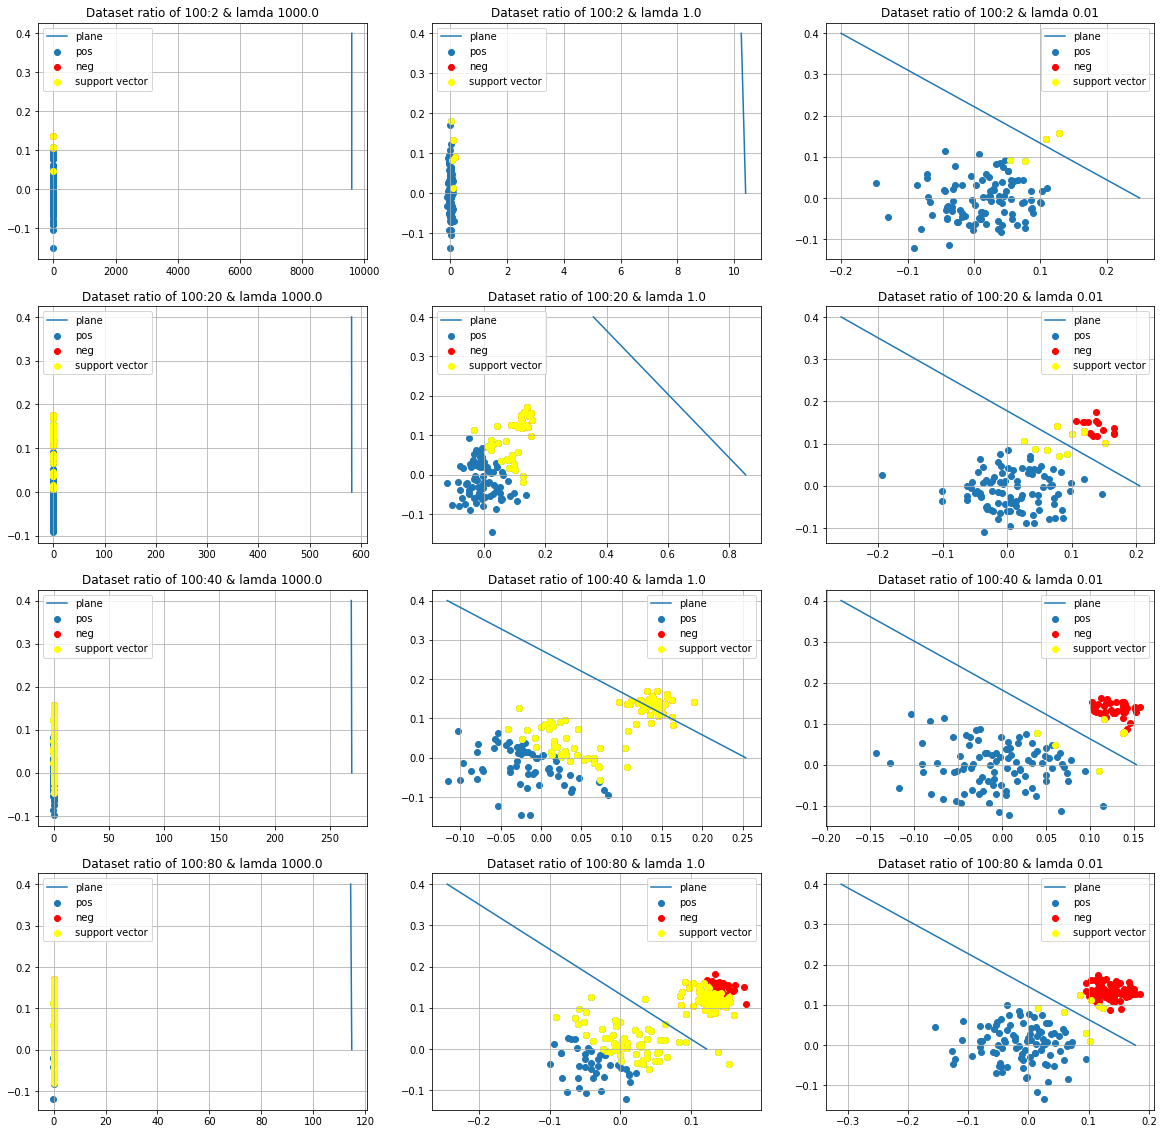

In [41]:
from sklearn.svm import SVC
c = [0.001, 1, 100]
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,20))
place = 0
for j,i in enumerate(ratios):
  for k in c:
    plt.subplot(4, 3, place+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    plt.grid()
    lin_svc_l1 = SVC(C=k,kernel='linear')
    lin_svc_l1.fit(X,y)
    coef = lin_svc_l1.coef_
    sup_vector = lin_svc_l1.support_vectors_
    plt.scatter(sup_vector[:,0],sup_vector[:,1],color='yellow')
    lamda = 1/k
    plt.title("Dataset ratio of "+str(i[0])+":"+str(i[1])+" & lamda "+str(lamda))
    coefs = []
    for m in coef:
      for j in m:
        coefs.append(j)
    intercept = lin_svc_l1.intercept_
    draw_line(coefs,intercept,0,0.4)  
    place += 1 
    plt.legend(["plane","pos","neg","support vector"])    
plt.show()

##Observation
* for data set of ratio (100:2) ,(100:20) and (100:40) :->
1.   Since it is imbalance data set , Model is more prone to underfit i.e it can affect hyperplane. So it classify majority of points as positive.
2.   With λ value very large followed by imbalance dataset , it is definetly going to underfit as we can see from above plot where λ = 1000.
3. As λ is decreasing , the regularization impact is reducing since it has higher chance to end up getting overfit. Thus hyperplane is coming closer and try to seperate datapoints.

* for data set of ratio (100:80)  :->
1. It is quiet balanced dataset.
2. With  λ value 1000 which is completly dominating regularization  over loss thus model endup getting underfit.
3.With λ value 1 ,model is neither overfit nor underfit.
4.With λ value 0.01 , regularization factor is diminishing .Thus model is more prone to overfit as we can see from above plot.

Note: As the model is moving from underfit to overfit, number of support vector is decreasing.




## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

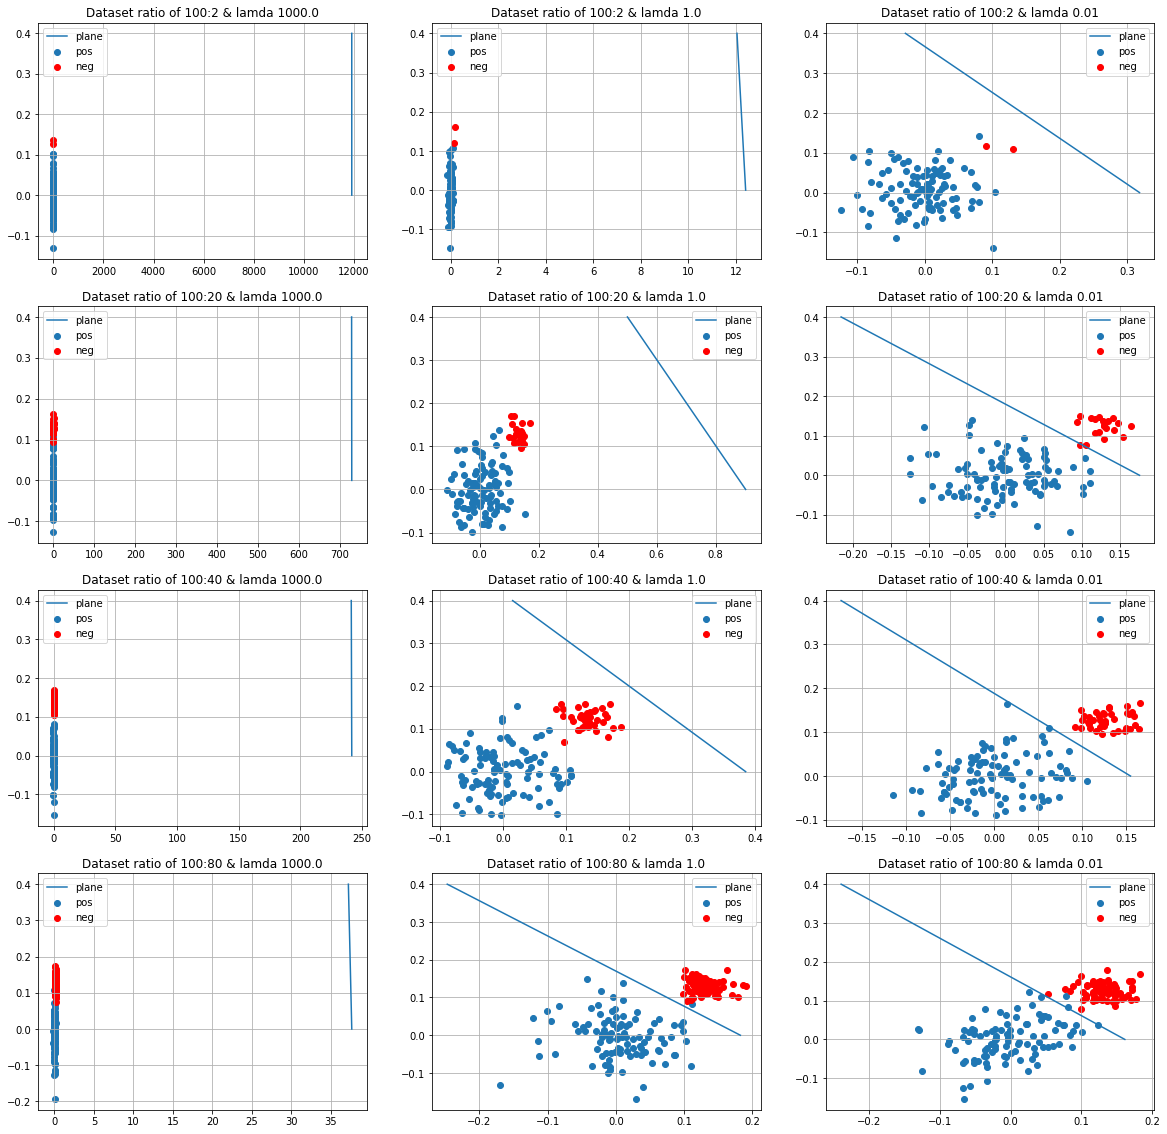

In [42]:
from sklearn.linear_model import LogisticRegression
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

plt.figure(figsize=(20,20))
place = 0
for j,i in enumerate(ratios):
  for c in [0.001, 1, 100]:
    plt.subplot(4, 3, place+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    plt.grid()
    lamda = 1/c
    plt.title("Dataset ratio of "+str(i[0])+":"+str(i[1])+" & lamda "+str(lamda))
    clf = LogisticRegression(C = c,random_state=0).fit(X, y)
    coef = clf.coef_
    coefs = []
    for m in coef:
      for j in m:
        coefs.append(j)
    intercept = clf.intercept_
    proba =clf.predict_proba(X)
    draw_line(coefs,intercept,0,0.4) 
    place += 1
    plt.legend(["plane","pos","neg"]) 
plt.show()

##Observation
* for data set of ratio (100:2) ,(100:20) and (100:40) :->
1.   Since it is imbalance data set , Model is more prone to underfit i.e it can affect hyperplane. So it classify majority of points as positive.
2.   With λ value very large followed by imbalance dataset , it is definetly going to underfit as we can see from above plot where λ = 1000.
3. As λ is decreasing , the regularization impact is reducing since it has higher chance to end up getting overfit. Thus hyperplane is coming closer and try to seperate datapoints.

* for data set of ratio (100:80)  :->
1. It is quiet balanced dataset.
2. With  λ value 1000 which is completly dominating regularization  over loss thus model endup getting underfit.
3.With λ value 1 ,model is neither overfit nor underfit.
4.With λ value 0.01 , regularization factor is diminishing .Thus model is more prone to overfit as we can see from above plot.

##Summary
* If datapoints are linearly seperable then linear SVM and logistic regression classifier both work the same .
*Both model can be impact by imbalance dataset.